# Baixando o dataset do Kaggle , e salvando na pasta onde o projeto está
Tendo em vista a area de dados, hoje em dia, todo tipo de dado é um "petroleo" nichado que pode ser umaa materia prima de grandes resultados. Com isso, vem crescendo ainda mais profissionais especilizados em desvendar e produzir esse refino do dado. Gerando mais investimentos nas areas de analises de dados, e na Inteligencia Artificial.
Baseando nisto, venho aprofundar-se mais nessa area, e resolvi desenvolver um projeto de analise de operações financeiras. 
Retirado do kaggle, o conjunto de dados contém transações realizadas por cartões de crédito em setembro de 2013 por portadores de cartões europeus, representando dois dias de um periodo, os dados **anonimizados** foram dispolibilizado por empresas de cartão de creditos.
É bom resaltar que dataset passou por uma transformação com intuito de diminuir a dimensionalidade dos dados. Foi usado PCA( Principal Component Analysis)

In [1]:
!pip install kagglehub


In [2]:
import kagglehub
import shutil
import os

# Baixando o dataset
download_path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

# Definindo o diretório de trabalho (onde você está)
current_dir = os.getcwd()

# Movendo arquivos baixados para a pasta atual
for file_name in os.listdir(download_path):
    shutil.move(os.path.join(download_path, file_name), current_dir)

print("Arquivos movidos para a pasta atual:", current_dir)


Arquivos movidos para a pasta atual: d:\estudo generalista\estudo data\Credit-Card-Fraud-Detection


In [3]:
#baixando as dependencias
!pip install scikit-plot seaborn imbalanced-learn matplotlib pandas numpy scikit-learn

In [4]:
# Importando as bibliotecas
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# configurando o estilo dos gráficos com seaborn
sns.set_style('dark')

In [5]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Explicando os tipos de dados
- Os recursos V1, V2, … V28 são os principais componentes obtidos com PCA, os únicos recursos que não foram transformados com PCA são 'Time' e 'Amount'. 
- O recurso 'Time' contém os segundos decorridos entre cada transação e a primeira transação no conjunto de dados. 
- O recurso 'Amount' é o valor da transação, esse recurso pode ser usado para aprendizado sensível a custos dependente de exemplo. 
- O recurso 'Class' é a variável de resposta e assume o valor 1 em caso de fraude e 0 em caso contrário.


## Análise Exploratória dos Dados do DataSet

In [6]:
print(f'Dimensão do df: \nLinhas: {df.shape[1]} \nColunas: {df.shape[0]}')
print(f'Colunas presentes: {df.columns}')

Dimensão do df: 
Linhas: 31 
Colunas: 284807
Colunas presentes: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [7]:
# Tipos de dados que temos no dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
#verificando se há nulo
df.isnull().values.any()

False

In [9]:
#resumo estatístico
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Não fraudes: 284315
fraudes: 492

Não Fraudes: 99.83%
Fraudes: 0.17% 


Text(0.5, 1.0, 'Distrivbuiçao de class \n (0: Fraude || 1: Não Fraude)')

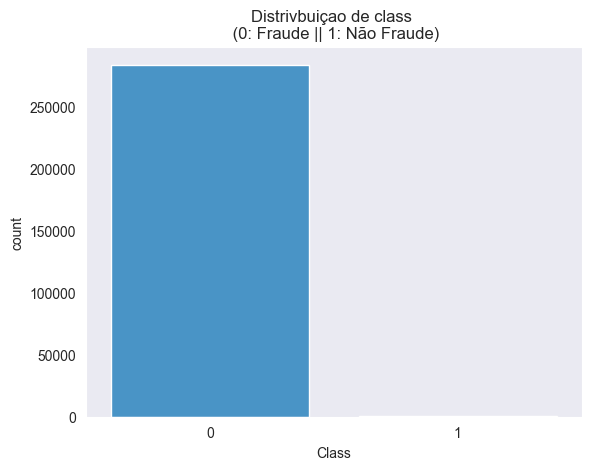

In [10]:
print('Não fraudes: {}'.format(df['Class'].value_counts()[0]))
print('fraudes: {}'.format(df['Class'].value_counts()[1]))
# Em porcentagens
print('\nNão Fraudes: {:.2f}%'.format((df[df.Class == 0].shape[0] / df.shape[0]) * 100))
print('Fraudes: {:.2f}% '.format((df[df.Class == 1].shape[0] / df.shape[0]) * 100))

colors = ['#3498db', '#f1c40f']
ax = sns.countplot(x= 'Class',data=df,palette=colors)
ax.set_title('Distrivbuiçao de class \n (0: Fraude || 1: Não Fraude)')

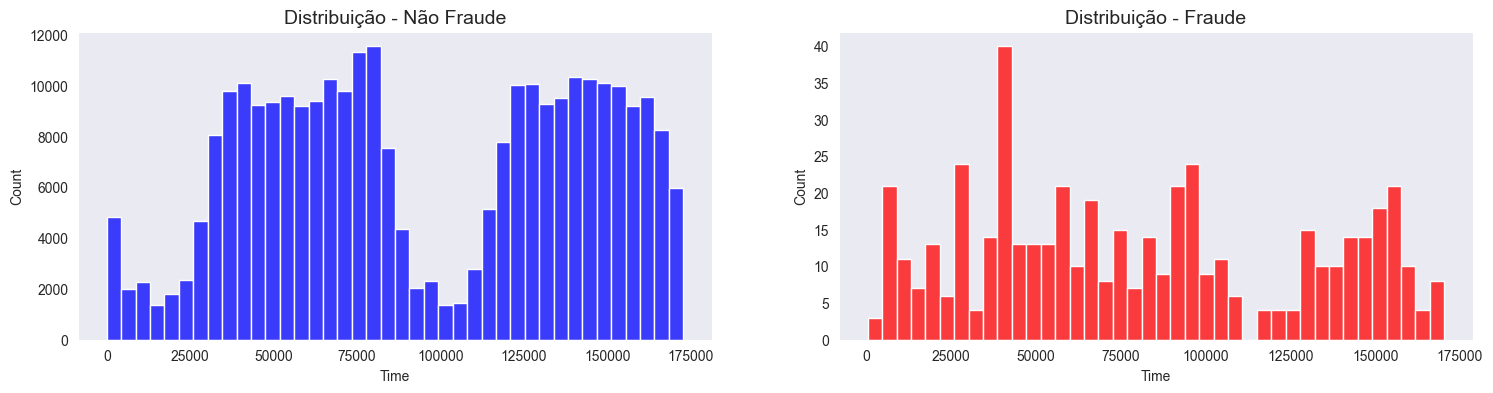

In [11]:
#Comparação de distribuição das duas classes
fig, ax = plt.subplots(1, 2, figsize=(18,4))

class_0 = df.Time[df.Class == 0]
class_1 = df.Time[df.Class == 1]

sns.histplot(class_0, ax=ax[0], color='b', bins=40, kde=False)
ax[0].set_title('Distribuição - Não Fraude', fontsize=14)


sns.histplot(class_1, ax=ax[1], color='r', bins=40, kde=False)
ax[1].set_title('Distribuição - Fraude', fontsize=14);

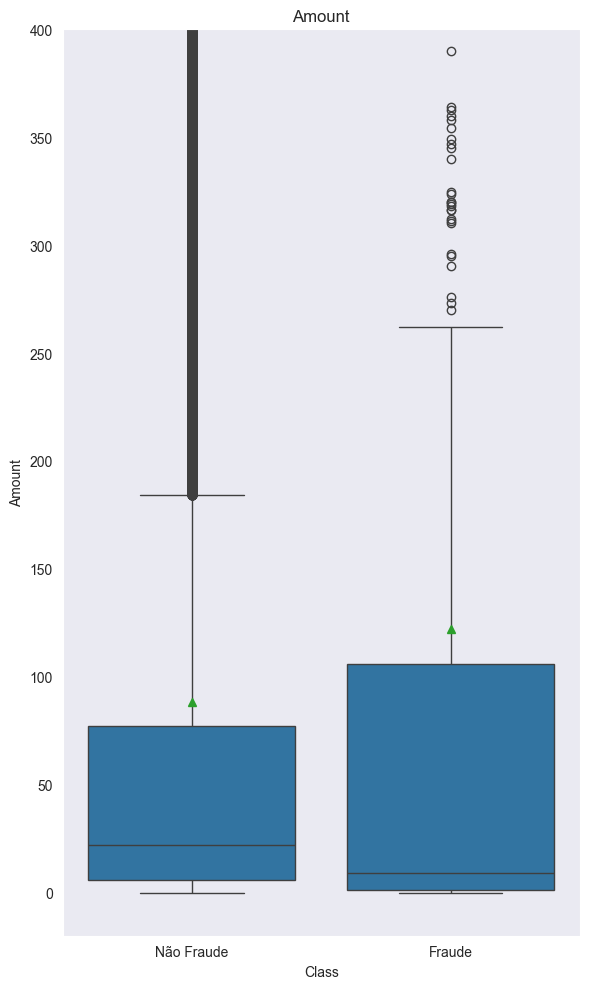

In [12]:
fig, ax = plt.subplots(figsize=(6, 10), sharex=True)

# Correct usage of sns.boxplot
sns.boxplot(x='Class', y='Amount', data=df, showmeans=True, ax=ax)

plt.ylim((-20, 400))
plt.xticks([0, 1], ['Não Fraude', 'Fraude'])
plt.title('Amount')

plt.tight_layout()
plt.show()

# Preparando os Dados

In [13]:
# RobustScaler é menos sensível a outliers
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [14]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [15]:
# divisão dos dados em treino e teste
X = df.drop('Class', axis=1)
y = df['Class']

# dividir o dataset entre treino e validação

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

# Balanceamento dos dados

Como há mais presença de dados não fraudulentos. Sendo os 17% em fraudulentos.

Precisamos tratar esse desbalanceamento para não inviesar o nosso algoritmo na hora do treinamento.

A técnica que será utilizada para balancear os dados será usando a biblioteca imblearn. Usaremos a técnica Under-sampling.

Class
0    369
1    369
Name: count, dtype: int64


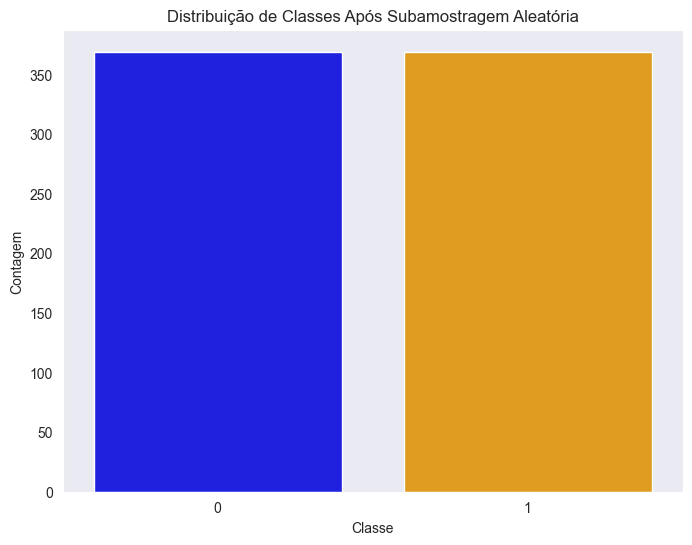

In [16]:
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

print(pd.Series(y_rus).value_counts())

# visualizando a nova distribuição de classes
plt.figure(figsize=(8, 6))
sns.countplot(x=y_rus, palette=['blue', 'orange'])  # Substitua 'blue' e 'orange' pelas cores desejadas
plt.title('Distribuição de Classes Após Subamostragem Aleatória')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.show()

Usando matriz de correlação no dataframe , visando visualizar as correlações de variáveis.

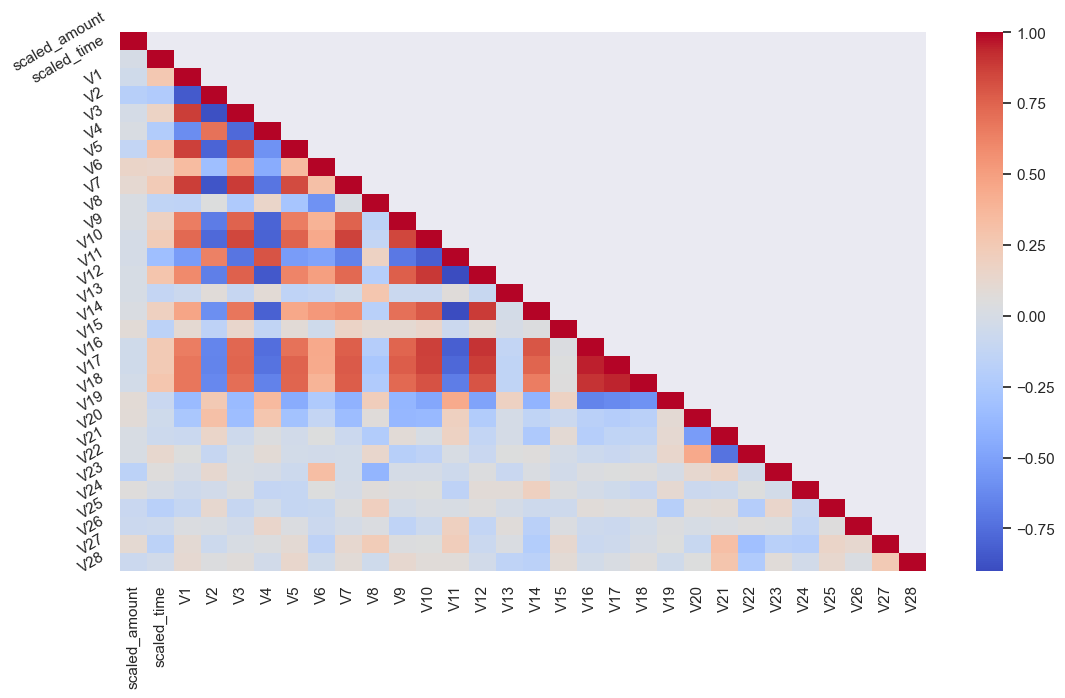

In [17]:
corr = X_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()

sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
mask = np.zeros_like(corr_rus)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns, 
                mask=mask, cmap='coolwarm')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

Criação do Modelo de Classificação

In [18]:
# Regressão Logística
np.random.seed(2)

model = LogisticRegression()
model.fit(X_rus, y_rus)

# fazendo as previsões em cima dos dados de teste
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

-- Métricas
Avaliando o modelo de Regressão logistica

In [19]:
# imprimindo a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# imprimindo a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))
     

Acurácia: 0.9624

AUC: 0.9406



In [20]:
# imprimindo relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9625    0.9808     71079
           1     0.0406    0.9187    0.0778       123

    accuracy                         0.9624     71202
   macro avg     0.5202    0.9406    0.5293     71202
weighted avg     0.9982    0.9624    0.9792     71202



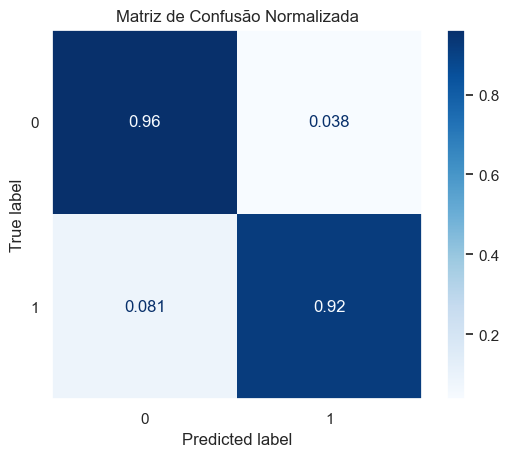

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

# plotando a matrix de confusão
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, normalize='true', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão Normalizada')
plt.show()